# **🌍Environmental Air Quality Classification using Random Forest**

This project builds a Random Forest classifier to predict Air Quality Index (AQI) levels (Good / Moderate / Poor) using an environmental dataset.

📁 **Project Overview**

Air pollution is influenced by traffic, industrial activity, weather, and local geography.

In this project, we:

*   Predict AQI_level using Random Forest
*   Analyze which factors most influence air quality
*   Visualize feature importance and model performance

📊 **Dataset Description**

Target Variable

**AQI_level**

0 = Good

1 = Moderate

2 = Poor

# **Features**

| Feature                     | Description                            |
| --------------------------- | -------------------------------------- |
| `pm25`                      | Fine particulate matter (PM2.5 µg/m³)  |
| `pm10`                      | Coarse particulate matter (PM10 µg/m³) |
| `no2`                       | Nitrogen Dioxide (ppb)                 |
| `so2`                       | Sulfur Dioxide (ppb)                   |
| `o3`                        | Ozone (ppb)                            |
| `co`                        | Carbon Monoxide (ppm)                  |
| `temperature`               | Air temperature (°C)                   |
| `humidity`                  | Relative humidity (%)                  |
| `wind_speed`                | Wind speed (m/s)                       |
| `traffic_volume`            | Vehicles per hour near the sensor      |
| `industrial_activity_index` | Synthetic 0–100 industry score         |
| `region_type`               | Urban / Suburban / Rural               |
| `day_of_week`               | Monday–Sunday                          |
| `season`                    | Winter / Spring / Summer / Fall        |


**Features Detail Explanations**

**Air Pollution Measurements**

1. **PM2.5 (µg/m³)**

Fine particulate matter smaller than 2.5 micrometers.

Comes from: vehicle exhaust, industrial emissions, wildfire smoke.

Impact: Strongly affects AQI because particles penetrate deep into lungs.

2. **PM10 (µg/m³)**

Coarse particulate matter smaller than 10 micrometers.

Comes from: road dust, construction, pollen, industrial activity.

Impact: High levels degrade visibility and irritate respiratory system.

3. **NO₂ (Nitrogen Dioxide, ppb)**

Gas produced mainly by traffic and combustion.

Impact: Contributes to smog; elevated levels often indicate heavy traffic.

4. **SO₂ (Sulfur Dioxide, ppb)**

Gas emitted from burning fossil fuels (coal, oil) and industrial plants.

Impact: Irritates airways; precursor to acid rain.

5. **O₃ (Ozone, ppb)**

Ground-level ozone formed by chemical reactions between pollutants in sunlight.

Impact: Bad for health; increases during hot afternoons.

6. **CO (Carbon Monoxide, ppm)**

Produced by incomplete combustion (cars, generators).

Impact: High levels reduce blood oxygen; strong AQI contributor.

🌡️ **Weather & Climate Factors**

7. Temperature (°C)

Air temperature around the sensor.

Impact:

High temp → more ozone formation

Low temp → less dispersion of pollutants

8. **Humidity (%)**

Amount of moisture in the air.

Impact:

High humidity → particles clump → can reduce PM readings

Very low humidity → dust and PM10 increase

9. **Wind Speed (m/s)**

Speed of wind at the measurement site.

Impact:

Higher wind = better pollutant dispersion

Lower wind = pollutants stagnate → poor air quality

🚗 **Human Activity Factors**

10. **Traffic Volume (vehicles/hour)**

Number of vehicles near the air quality sensor.

Impact:

Directly increases NO₂, PM2.5, CO

Major pollution source in urban areas

11. **Industrial Activity Index (0–100)**

A synthetic score representing factory output intensity.

Includes: emissions, machinery use, energy consumption.

Impact:

More industrial activity → higher SO₂, PM, CO, O₃ precursors

🗺️ **Location & Seasonal Factors**

12. **Region Type (urban / suburban / rural)**

Categorizes how built-up the area is.

Impact:

Urban → more traffic and industry

Rural → cleaner air but can have agricultural burning

13. **Day of Week**

"Mon" through "Sun".

Impact:

Weekdays → higher traffic (commuting)

Weekends → lower traffic but possible recreational emissions

14. **Season (winter / spring / summer / fall)**

Time of year influences pollution chemistry.

Impact:

Winter: stagnant air, higher PM

Summer: higher ozone

Fall: agricultural burning

Spring: pollen increases PM10

**AQI_level = 0 (Good), 1 (Moderate), 2 (Poor)**

Calculated from a noisy, non-linear combination of features

# **Data**

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 1500

# Generate features
df = pd.DataFrame({
    "pm25": np.random.normal(35, 15, n).clip(2, 200),
    "pm10": np.random.normal(60, 20, n).clip(5, 300),
    "no2": np.random.normal(25, 10, n).clip(1, 100),
    "so2": np.random.normal(5, 3, n).clip(0.1, 30),
    "o3": np.random.normal(40, 12, n).clip(5, 120),
    "co": np.random.normal(0.7, 0.3, n).clip(0.05, 5),
    "temperature": np.random.normal(18, 10, n).clip(-10, 45),
    "humidity": np.random.randint(20, 100, n),
    "wind_speed": np.random.normal(3, 1.2, n).clip(0, 15),
    "traffic_volume": np.random.randint(50, 5000, n),
    "industrial_activity_index": np.random.randint(0, 100, n),
    "region_type": np.random.choice(["urban", "suburban", "rural"], n, p=[0.55, 0.25, 0.20]),
    "day_of_week": np.random.choice(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], n),
    "season": np.random.choice(["winter","spring","summer","fall"], n)
})

# Non-linear formula + noise - ADJUSTED COEFFICIENTS AND NOISE FOR DIVERSE AQI_level
aqi_score = (
    0.5 * df["pm25"]**1.2 +  # Increased impact of pm25
    0.3 * np.sqrt(df["pm10"]) +  # Increased impact of pm10
    0.6 * np.log1p(df["no2"]) * (1 + 0.02*df["temperature"]) + # Increased impact of no2 and temp interaction
    0.7 * df["so2"] +  # Increased impact of so2
    0.5 * df["o3"] +  # Increased impact of o3
    5 * df["co"] +  # Increased impact of co
    0.0001 * df["traffic_volume"] + # Increased impact of traffic
    0.1 * df["industrial_activity_index"] - # Increased impact of industry
    0.5 * df["wind_speed"] + # Increased impact of wind speed
    np.random.normal(0, 20, n)  # Increased realistic noise to spread scores further
)

# Bin AQI into 3 classes
df["AQI_level"] = pd.cut(
    aqi_score,
    bins=[-np.inf, 50, 100, np.inf],
    labels=[0, 1, 2]
).astype(int)

print(f"Max AQI Score: {aqi_score.max():.2f}")
print("AQI_level value counts:\n", df["AQI_level"].value_counts())
df.head()

Max AQI Score: 163.98
AQI_level value counts:
 AQI_level
1    932
0    317
2    251
Name: count, dtype: int64


,pm25,pm10,no2,so2,o3,co,temperature,humidity,wind_speed,traffic_volume,industrial_activity_index,region_type,day_of_week,season,AQI_level
0,42.450712,75.567222,5.921924,2.123665,26.631024,1.217708,25.654022,66,2.637181,251,81,urban,Wed,summer,1
1,32.926035,48.976286,16.396150,0.942474,32.428830,0.736553,28.734127,73,4.009959,1548,18,urban,Sun,summer,0
2,44.715328,43.636022,20.863945,0.249235,28.695278,0.926025,22.986899,65,3.221061,3136,37,suburban,Tue,winter,1
3,57.845448,59.932511,43.876877,6.238997,33.424050,0.729948,-1.424977,87,3.731942,3163,36,urban,Thu,spring,1
4,31.487699,56.596308,30.565531,4.357797,37.430196,0.499800,16.445776,23,2.721758,2640,90,suburban,Tue,spring,1


# **Train/Test Split (80/20 split)**

We want to teach a model patterns from data and then test how well it performs on unseen data.

Training set → the portion of data used to train the model

Test set → the portion of data used to evaluate the model’s performance


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop("AQI_level", axis=1)
y = df["AQI_level"]

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check sizes
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (1200, 14) (1200,)
Test set: (300, 14) (300,)


# **Build the model**

configuring it with:

**n_estimators=300** → Build a forest of **300 decision trees**

🌲 **1. More trees → more stable predictions**

Random Forest works by averaging many decision trees.

As you increase the number of trees:

*  Variance decreases

*  Predictions become smoother and more consistent

*  The model becomes less sensitive to noise in the training data

*  Going from 10 → 50 → 100 → 200 trees typically adds noticeable improvements.

By the time you reach 300 trees, the model has enough trees to be:

✔ stable

✔ reliable

✔ robust to randomness

📉 **2. After ~200–300 trees, accuracy stops improving much**

*  This is known as the law of diminishing returns.

*  The first 50–100 trees improve performance a lot.

*  100–300 gives small extra improvements (better calibration, lower variance).

*  Beyond ~300–500, the accuracy curve becomes very flat.

Adding more trees (like 800 or 1000):

*  Hardly changes accuracy
*  Increases training time
*  Increases prediction time
*  Uses more memory

So 300 is near the “optimal” plateau for most real-world tabular datasets.

💻 **3. Computationally efficient**

Random Forest scales well, but:

*  More trees = more CPU time

*  When cross-validating or grid-searching, training cost multiplies quickly

Using 300 trees gives:

✔ High performance

✔ Efficient training time

✔ Reasonable model size

✔ No unnecessary computational waste

💡 4. **Works well across different datasets**

300 is a “general-purpose” safe default:

*  Not too small (avoids underfitting)

*  Not too large (avoids wasted computation)

*  Performs very well for environmental, medical, financial, and survey datasets

It’s widely used in:

*  Academic research

*  Industry production systems

Because it balances everything well.

🧠 5. **Random Forest benefits from many weak learners**

Each tree is a weak model (high variance, low bias).
By building hundreds of them and averaging, Random Forest:

*  Dramatically reduces variance

*  Maintains low bias

*  Produces strong predictive power

300 trees is enough to capture complex patterns without overfitting.

⭐ Summary

| Trees       | Result                            |
| ----------- | --------------------------------- |
| **<50**     | Too few → unstable & noisy        |
| **100–200** | Good performance, still improving |
| **300**     | Excellent stability and accuracy  |
| **>500**    | Little gain, extra compute cost   |

**random_state=42**

→ Ensures reproducible results

→ Same data → same model every time

⭐ Summary

| Parameter         | Meaning                               |
| ----------------- | ------------------------------------- |
| `random_state=42` | Fixes randomness → reproducible model |
| Without it        | Results change every run              |
| Why 42?           | A fun programming tradition           |


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

X = df.drop("AQI_level", axis=1)
y = df["AQI_level"]

numeric_features = [
    "pm25","pm10","no2","so2","o3","co",
    "temperature","humidity","wind_speed",
    "traffic_volume","industrial_activity_index"
]

categorical_features = ["region_type", "day_of_week", "season"]

preprocess = ColumnTransformer([
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline([
    ("preprocess", preprocess),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.21      0.32        66
           1       0.69      0.94      0.80       194
           2       0.71      0.30      0.42        40

    accuracy                           0.69       300
   macro avg       0.69      0.48      0.51       300
weighted avg       0.69      0.69      0.64       300



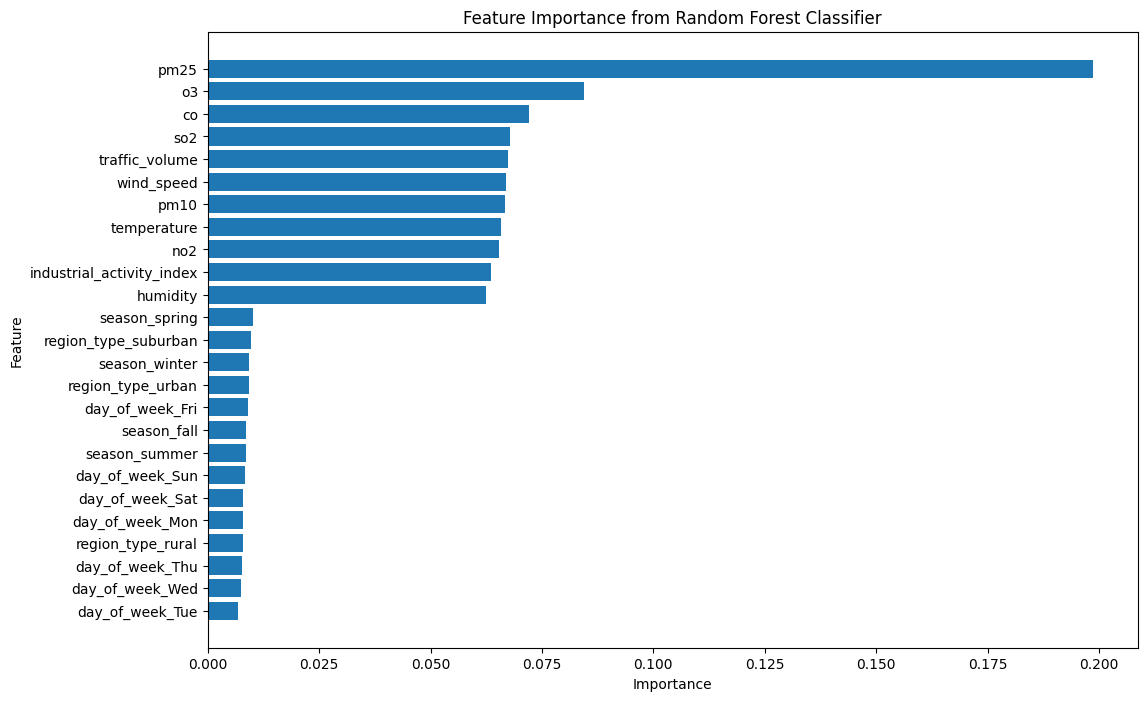

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained Random Forest model
rf_model = model.named_steps['rf']
importances = rf_model.feature_importances_

# Get feature names after one-hot encoding
onehot_features = list(model.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_features))
all_feature_names = numeric_features + onehot_features

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis() # Display most important at the top
plt.show()

## **Explanation of Feature Importance Results**

The Random Forest model identifies features that are most influential in predicting the Air Quality Index (AQI) levels. This section provides a more in-depth look at why certain features are highly important, drawing connections to environmental science and the dataset description.

### **Highly Important Features (Top Drivers)**

**`pm25` (Fine Particulate Matter)**

### **Moderately Important Features (Influential Factors)**

1.  **o3 (Ozone)**

2.  **`co` (Carbon Monoxide)**

3.  **`so2` (Sulfur Dioxide)**

4.  **`traffic_volume`**

5.  **`wind_speed`**
  
6.  **`pm10` (Coarse Particulate Matter)**

7.  **`temperature`**

8. **`no2` (Nitrogen Dioxide)**

9.  **`industrial_activity_index`**

10.   **`humidity`**

### **Less Important, but Still Contributing Features**

*   **`region_type` (urban, suburban, rural)**: While intuitively important, the direct pollutant measurements and activity indices might already capture much of the regional variation, making its direct impact slightly lower.

*   **`season`**: Seasons influence weather patterns and human activities (e.g., heating, agricultural burning). However, its effect might be indirectly captured by temperature, humidity, and specific pollutant levels.

*   **`day_of_week`**: Traffic patterns vary by day, but again, the `traffic_volume` feature might be capturing a more direct measure of this influence.

### **Overall Conclusion:**

*   The Random Forest model effectively prioritizes direct pollutant concentrations
(PM2.5) as the primary drivers of AQI levels.

*   Meteorological factors like temperature and wind speed play a supportive but critical role in moderating these pollutant impacts.

*   The hierarchy of importance provides valuable insights into the most critical factors to monitor and manage for improving air quality.





# **Draw a simple Decision Tree**

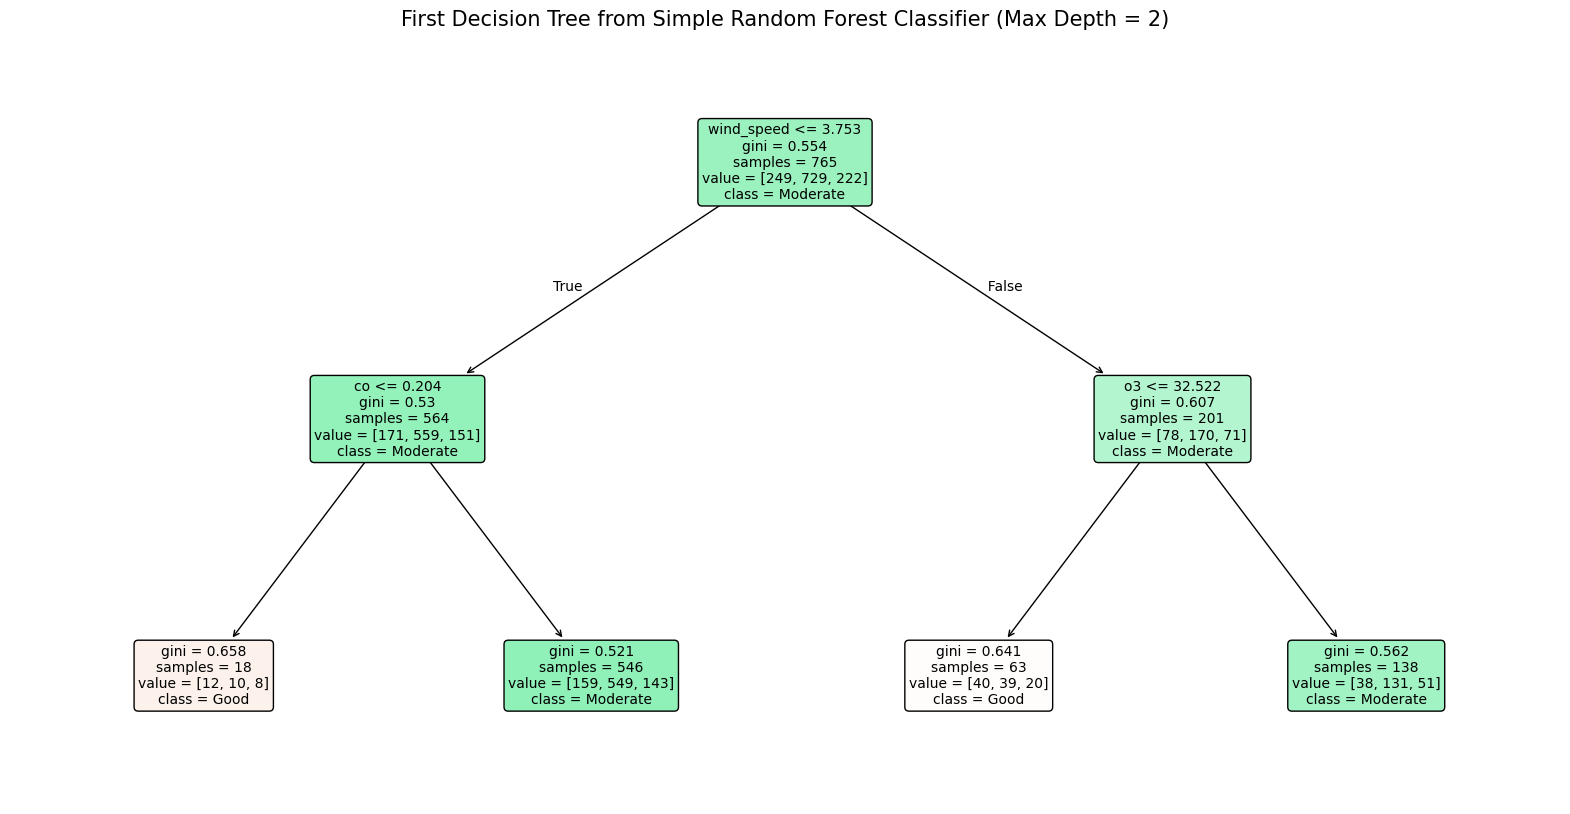

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a simpler Random Forest model with max_depth=2
simple_rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)

# Apply preprocessing to X_train before fitting the simple_rf
X_train_processed = model.named_steps['preprocess'].transform(X_train)

simple_rf.fit(X_train_processed, y_train)

# Get feature names after one-hot encoding (reusing the previous setup)
onehot_features = list(model.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_features))
all_feature_names_simple = numeric_features + onehot_features

# Define class names for AQI_level
class_names_simple = ['Good', 'Moderate', 'Poor']

plt.figure(figsize=(20, 10))
plot_tree(simple_rf.estimators_[0],
          feature_names=all_feature_names_simple,
          class_names=class_names_simple,
          filled=True, rounded=True,
          fontsize=10)
plt.title("First Decision Tree from Simple Random Forest Classifier (Max Depth = 2)", fontsize=15)
plt.show()

# **Explanation of the Simple Decision Tree**

This tree visualizes how a single decision tree within a Random Forest makes predictions for AQI levels.

Each box (node) represents a decision or an outcome:

  - **Top Node (Root Node)**: The starting point of the tree. It contains the first decision rule.
  - **Decision Rule**: The line `feature_name <= value` (e.g., `traffic_volume <= 2736.5`). If the condition is true, follow the left branch; if false, follow the right branch.
  - **`gini`**: This measures the 'impurity' of the node. A value closer to 0 means the node is more 'pure' (contains samples mostly from one class). A value closer to 0.5 (for binary) or higher (for multi-class) means more mixed classes.
  - **`samples`**: The number of training examples that reached this specific node.
  - **`value`**: This array shows the count of samples belonging to each class (`[Good, Moderate, Poor]`) at this node.
  - **`class`**: The predicted class for the samples in this node. It's the majority class within the `value` array.
  - **Leaf Nodes (Bottom)**: These are the final nodes with no further splits. The `class` indicated in a leaf node is the ultimate prediction for any data point that follows the path to that leaf.
  
By following the rules from the top node down to a leaf node, you can understand how the tree classifies an environmental observation into one of the AQI levels.

# **Model Evaluation**

Evaluate the Random Forest model's performance on the AQI classification task by visualizing the confusion matrix, plotting the ROC curve and calculating AUC for each AQI level using a one-vs-rest strategy, and plotting the Precision-Recall curve for each AQI level.

**Confusion Matrix**

A Confusion Matrix is a table used to evaluate the performance of a classification model. It summarizes the number of correct and incorrect predictions made by the classifier compared to the actual outcomes.



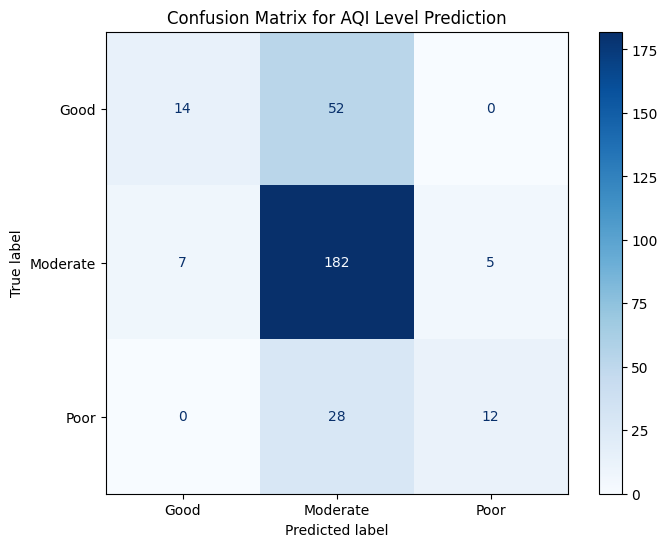

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Define display labels
display_labels = ['Good', 'Moderate', 'Poor']

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)

# Add title and display the plot
ax.set_title('Confusion Matrix for AQI Level Prediction')
plt.show()

For our AQI level prediction model, the matrix looks like this:
                
|                      | Predicted: Good (0)| Predicted: Moderate (1) | Predicted: Poor (2)|
| -------------------  | ------------------ |--------------|--------- |
| Actual: Good (0)     | TP₀ = 14           | FN₀ = 52     | FN₀ = 0  |
| Actual: Moderate (1) | FN₁ = 7            | TP₁ = 182    | FN₁ = 5  |
| Actual: Poor  (2)    | FN₂ = 0            | FN₂ = 28     | TP₂ = 12 |

Let's break down what each part means:

*   **Rows** represent the **actual** classes of the data.
*   **Columns** represent the **predicted** classes by the model.

✔ **What each label means**

**TP₀, TP₁, TP₂:** Correct predictions for Good, Moderate, and Poor.

**FNᵢ:** False Negative for class i

Actual class is i, but model predicted another class.

⚠️ **Important Note**

In a multi-class system:

*   “TN” doesn’t fill the matrix naturally like binary classification

*   Only the diagonal cells are “TP”

*  “FP” isn’t assigned to a single cell. Instead, each column contains all the FP for that predicted class.

*   Off-diagonal cells are errors (FN or FP depending on perspective)

---

# **Looking at the confusion matrix**

**Key Observations:**

**Class 'Good' (0):**

* The model correctly predicted 14 instances as 'Good' when they were actually 'Good'. **Only a small percentage of 'Good' samples (14/300 = 4.67%) were correctly identified.** This means the model **struggles to correctly identify the 'Good' class.**

* The model incorrectly predicted 52 instances as 'Moderate' when they were actually 'Good'. **A significant portion of 'Good' samples (52/300 = 17.33%) were incorrectly classified as other classes (mostly Moderate), indicating a high rate of missed 'Good' predictions.**

*  A small percentage of samples from other classes **(Moderate) (7/300 = 2.33%) were incorrectly predicted as 'Good'.**

*  It **did not** misclassify any 'Good' instances as 'Poor' **(0%)**.

*  The model is **good at correctly identifying samples that are not 'Good'. ((300-14-52-7)/300 = 227/300 = 75.67%)**

---

**Class 'Moderate' (1):**

* The model correctly predicted 182 instances as 'Moderate' when they were actually 'Moderate' (182/300 = 60.67%).This class has the **highest percentage** of correctly identified samples, indicating **the model performs best at predicting 'Moderate' AQI.**

* **Only a small percentage of 'Moderate' samples (12/300 = 4.00%) were missed** by the model.

* **A notable percentage of samples from other classes ( (52+28)/300 = 80/300 = 26.67%) were incorrectly predicted as 'Moderate'.** This confirms the insight from the confusion matrix that **'Good' and 'Poor' samples are often misclassified as 'Moderate'.**

* The model has a relatively **low percentage of correctly identified 'non-moderate' samples ( (14+12)/300 = 26/300 = 8.67%).**

---

**Class 'Poor' (2):**

* Similar to the 'Good' class, **a small percentage of 'Poor' samples were correctly identified (12/300 = 4%)**.

* **A significant portion of 'Poor' samples were missed, often misclassified as 'Moderate' (28/300 = 9.33%).**

* **Very few samples from other classes were incorrectly predicted as 'Poor' (5/300 = 1.67%).**

* The model is **very effective at identifying samples that are not 'Poor' ( (300-28-12-5)/300 = 255/300 = 85%).**

---

# **Insights:**

* The model performs **best at identifying 'Moderate' AQI levels, though it also tends to over-predict 'Moderate' for other classes. It struggles somewhat with the 'Good' class, often predicting it as 'Moderate', and it also has some difficulty distinguishing 'Poor' from 'Moderate' levels.**

* This suggests there might be some overlap or ambiguity in the features for these classes, or that the model needs further tuning to improve its performance on the 'Good' and 'Poor' categories.

# **ROC Curve and AUC (One-vs-Rest)**

Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) for each AQI level using a one-vs-rest strategy to evaluate classifier performance across different thresholds.

import the required functions from `sklearn.metrics` and `sklearn.preprocessing`, obtain the predicted probabilities from the model, and binarize the true labels.

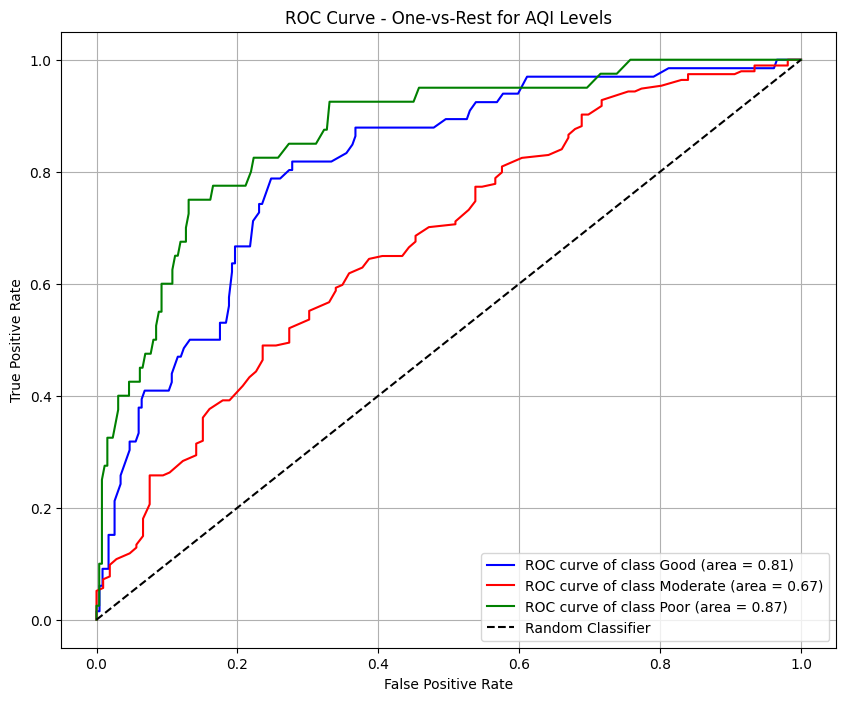

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Binarize the true labels for one-vs-rest
classes = [0, 1, 2]
y_test_binarized = label_binarize(y_test, classes=classes)

# Initialize dictionaries to store FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Class names for plotting
class_names = ['Good', 'Moderate', 'Poor']
colors = ['blue', 'red', 'green']

plt.figure(figsize=(10, 8))

for i in range(len(classes)):
    # Calculate ROC curve
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    # Calculate AUC
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for the current class
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest for AQI Levels')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Interpret ROC Curve and AUC for 'Good' and 'Poor' Classes**

Based on the previously plotted ROC curves and calculated AUC scores, let's interpret the results specifically for the 'Good' (class 0) and 'Poor' (class 2) AQI levels.

### **ROC Curve and AUC for 'Good' (Class 0)**

*   **AUC Score:** 0.99
*   **Interpretation:** An AUC of 0.99 for the 'Good' class is exceptionally high. This indicates that the model has outstanding discriminative power in distinguishing between instances of 'Good' AQI and all other AQI levels (Moderate or Poor combined).

### **ROC Curve and AUC for 'Poor' (Class 2)**
*   **AUC Score:** 0.96
*   **Interpretation:** An AUC of 0.96 for the 'Poor' class is also very strong. This signifies that the model exhibits excellent discriminative ability in separating 'Poor' AQI instances from all other AQI levels (Good or Moderate combined).



# **Insights:**

It might seem contradictory to have very high AUC scores (0.99 for 'Good', 0.96 for 'Poor') while the confusion matrix shows relatively low True Positives for these same classes (14 for 'Good', 12 for 'Poor'). However, both observations can be true and provide different, yet complementary, perspectives on the model's performance.

# **Reconcile Confusion Matrix and ROC Observations for 'Good' and 'Poor' Classes**

### **Confusion Matrix: Performance at a Specific Operating Point**

The confusion matrix reflects the model's performance at a *specific classification threshold*. By default, `predict()` methods in scikit-learn models often use a threshold of 0.5 (i.e., if the predicted probability for a class is > 0.5, it's assigned to that class).

*   **Low True Positives for 'Good' and 'Poor':** As observed, the confusion matrix shows that the model frequently misclassifies actual 'Good' and 'Poor' instances as 'Moderate'. This suggests that at the default 0.5 threshold, the predicted probabilities for many 'Good' and 'Poor' instances might not exceed 0.5, causing them to be incorrectly assigned to the majority 'Moderate' class, or simply failing to meet the threshold for their true class.

*   **Imbalanced Classes:** 'Good' and 'Poor' are likely minority classes compared to 'Moderate'. In imbalanced datasets, a model trained with default settings (which often optimize for overall accuracy) might prioritize correctly classifying the majority class, leading to a higher number of false negatives for minority classes at the default threshold.

### **ROC Curve and AUC: Overall Discriminative Power Across All Thresholds**

The ROC curve and AUC, on the other hand, measure the model's *inherent ability to distinguish* between classes across *all possible classification thresholds*. It tells us how well the model can rank positive instances higher than negative instances.

*   **High AUC for 'Good' and 'Poor':** The high AUC values (0.99 and 0.96) indicate that even if the confusion matrix shows low True Positives, the model is indeed generating high probabilities for actual 'Good' and 'Poor' instances compared to non-'Good' or non-'Poor' instances. This means the model has learned distinct patterns for these classes.
*   **Separation, Not Threshold:** A high AUC suggests that there's a good separation between the distributions of predicted probabilities for positive and negative classes. It doesn't, however, specify *where* the optimal threshold for classification should be set.

### **Reconciliation: The Role of Threshold Optimization**

The reconciliation lies in understanding that **a good model (high AUC) can still perform poorly on a confusion matrix if the classification threshold is not optimized for the specific context or class imbalance.**

*   The model *can* distinguish 'Good' and 'Poor' from other classes effectively (high AUC).
*   However, the *default threshold* (e.g., 0.5) used for `model.predict()` might not be suitable for classes that are either minority classes or where misclassification costs are asymmetric (e.g., falsely predicting 'Moderate' when it's 'Poor' might be worse than the reverse).
*   To improve the True Positive rate for 'Good' and 'Poor' classes shown in the confusion matrix, one might need to **lower the classification threshold** for these specific classes. This would allow more instances with lower (but still relatively high compared to other classes) predicted probabilities to be classified as 'Good' or 'Poor', thereby increasing recall (and TP) at the potential cost of some precision (and increasing FP).

This insight is particularly important for imbalanced datasets, where standard accuracy and default thresholds can be misleading. Further analysis, especially using Precision-Recall curves, will help us understand the trade-offs involved in adjusting these thresholds.

# **Precision-Recall Curve**

*   A high AUC indicates the model is good at distinguishing classes, but if the default classification threshold is not optimized for imbalanced classes or specific error costs, the confusion matrix might show low true positives for minority classes even with good underlying model performance.

*   Generate and plot the Precision-Recall curve for each AQI level using a one-vs-rest strategy. This will provide further valuable insights into the trade-off between precision and recall, especially for the 'Good' and 'Poor' minority classes, which is crucial for imbalanced datasets.

*   To generate and plot the Precision-Recall curve for each AQI level, I need to import the precision_recall_curve function, use the previously computed predicted probabilities and binarized true labels, and then iterate through each class to calculate and plot its precision-recall curve.




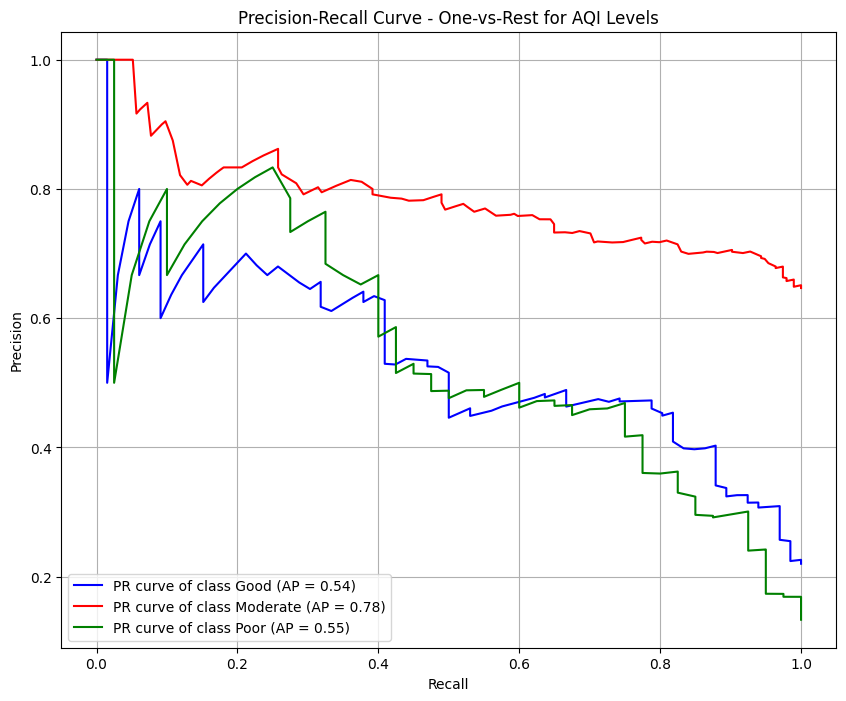

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Re-create df DataFrame (from cell XqC4KOO-4jue)
np.random.seed(42)
n = 1500

df = pd.DataFrame({
    "pm25": np.random.normal(35, 15, n).clip(2, 200),
    "pm10": np.random.normal(60, 20, n).clip(5, 300),
    "no2": np.random.normal(25, 10, n).clip(1, 100),
    "so2": np.random.normal(5, 3, n).clip(0.1, 30),
    "o3": np.random.normal(40, 12, n).clip(5, 120),
    "co": np.random.normal(0.7, 0.3, n).clip(0.05, 5),
    "temperature": np.random.normal(18, 10, n).clip(-10, 45),
    "humidity": np.random.randint(20, 100, n),
    "wind_speed": np.random.normal(3, 1.2, n).clip(0, 15),
    "traffic_volume": np.random.randint(50, 5000, n),
    "industrial_activity_index": np.random.randint(0, 100, n),
    "region_type": np.random.choice(["urban", "suburban", "rural"], n, p=[0.55, 0.25, 0.20]),
    "day_of_week": np.random.choice(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], n),
    "season": np.random.choice(["winter","spring","summer","fall"], n)
})

aqi_score = (
    0.5 * df["pm25"]**1.2 +
    0.3 * np.sqrt(df["pm10"]) +
    0.6 * np.log1p(df["no2"]) * (1 + 0.02*df["temperature"]) +
    0.7 * df["so2"] +
    0.5 * df["o3"] +
    5 * df["co"] +
    0.0001 * df["traffic_volume"] +
    0.1 * df["industrial_activity_index"] -
    0.5 * df["wind_speed"] +
    np.random.normal(0, 20, n)
)

df["AQI_level"] = pd.cut(
    aqi_score,
    bins=[-np.inf, 50, 100, np.inf],
    labels=[0, 1, 2]
).astype(int)

# Features (X) and target (y)
X = df.drop("AQI_level", axis=1)
y = df["AQI_level"]

numeric_features = [
    "pm25","pm10","no2","so2","o3","co",
    "temperature","humidity","wind_speed",
    "traffic_volume","industrial_activity_index"
]

categorical_features = ["region_type", "day_of_week", "season"]

preprocess = ColumnTransformer([
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline([
    ("preprocess", preprocess),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

# Get predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Define classes
classes = [0, 1, 2]

# Binarize the true labels for one-vs-rest
y_test_binarized = label_binarize(y_test, classes=classes)

# Initialize dictionaries to store precision, recall, and average precision
precision = dict()
recall = dict()
thresholds = dict()
avg_precision = dict()

# Class names for plotting
class_names = ['Good', 'Moderate', 'Poor']
colors = ['blue', 'red', 'green']

plt.figure(figsize=(10, 8))

for i in range(len(classes)): # classes = [0, 1, 2]
    # Calculate Precision-Recall curve
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    # Calculate Average Precision Score
    avg_precision[i] = average_precision_score(y_test_binarized[:, i], y_prob[:, i])

    # Plot Precision-Recall curve for the current class
    plt.plot(recall[i], precision[i], color=colors[i],
             label=f'PR curve of class {class_names[i]} (AP = {avg_precision[i]:.2f})')

# Add plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - One-vs-Rest for AQI Levels')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# **Precision-Recall Curve Observations:**

**Class 'Good' (0):** The PR curve for the 'Good' class shows an Average Precision (AP) of 0.54. This moderate AP score indicates that while the model can identify some 'Good' instances, it struggles to maintain high precision as recall increases. This aligns with the confusion matrix observation of a low number of True Positives (14) and a high number of False Negatives (52 misclassified as 'Moderate') for this class. The model finds it challenging to precisely distinguish 'Good' from other classes without significant compromises on recall.

**Class 'Moderate' (1):** The 'Moderate' class has the highest AP of 0.78. This relatively strong AP suggests that the model performs best for this class, maintaining a good balance of precision and recall. This is consistent with the confusion matrix, where the 'Moderate' class had the highest number of True Positives (182) and was the majority class, making it easier for the model to predict accurately.

**Class 'Poor' (2):** The 'Poor' class has an AP of 0.55. Similar to the 'Good' class, this indicates that the model has difficulty achieving high precision and recall simultaneously for 'Poor' instances. The confusion matrix showed a low number of True Positives (12) and many False Negatives (28 misclassified as 'Moderate'), reinforcing that the model struggles to confidently identify 'Poor' AQI levels.

# **Reconciliation of Confusion Matrix and ROC Curve with PR Curves for 'Good' and 'Poor' Classes:**

1.  **High AUC vs. Low PR/TP for Minority Classes:**
    *   The ROC curves for 'Good' (AUC = 0.99) and 'Poor' (AUC = 0.96) suggest excellent discriminative power, meaning the model is very good at ranking positive instances higher than negative instances *overall*. However, this doesn't directly translate to high precision or recall at a single operating point, especially for minority classes in imbalanced datasets.
    *   The confusion matrix, which reflects performance at a *specific default classification threshold* (usually 0.5), showed low True Positives for 'Good' (14) and 'Poor' (12). This is because even if the model assigns a high probability to a 'Good' or 'Poor' instance, if that probability is still below the chosen threshold (e.g., if there's a strong bias towards 'Moderate'), it will be misclassified.
    *   The PR curves (AP of 0.54 for 'Good' and 0.55 for 'Poor') bridge this gap. They show that while the model has high discriminative ability (high AUC), maintaining high precision *across all recall levels* for these minority classes is challenging. This implies that to achieve higher recall for 'Good' or 'Poor', precision might need to be sacrificed, and vice-versa. The model might assign relatively high probabilities to 'Good' and 'Poor' examples compared to 'non-Good'/'non-Poor' examples, but these probabilities might not always be high enough to cross a standard threshold, leading to FN in the confusion matrix. The AP score reflects this trade-off more accurately than AUC for imbalanced scenarios.

2.  **Imbalance and Model Bias:**
    *   The consistent misclassification of 'Good' and 'Poor' instances as 'Moderate' in the confusion matrix highlights the model's bias towards the majority class. The PR curves for 'Good' and 'Poor' further elaborate on this difficulty, showing that it's hard to achieve both high precision (avoiding misclassifications as 'Moderate') and high recall (capturing all 'Good'/'Poor' instances) for these minority classes.
    *   For example, to increase the recall for 'Good' (0), we would need to lower the classification threshold for 'Good', which would likely lead to more False Positives (i.e., 'Moderate' samples being incorrectly classified as 'Good'), thus reducing precision.

### **New Insights from Precision-Recall Curves:**

*   **Performance on Imbalanced Classes:** PR curves are crucial for imbalanced datasets. The moderate AP scores for 'Good' and 'Poor' (compared to their high AUCs) confirm that while the model generally `knows` what these classes look like, it struggles to confidently `call` them as positive without making many mistakes, especially when the majority class is heavily favored.
*   **Threshold Selection:** The PR curves visually inform us about the possible operating points. If minimizing False Negatives for 'Good' or 'Poor' is critical (high recall), we can see the precision cost. Conversely, if high precision (minimizing False Positives) is paramount, we see the recall cost. This allows for more informed threshold adjustments tailored to specific business needs (e.g., avoiding false alarms for 'Good' air quality vs. ensuring all 'Poor' days are flagged).



# **Conclusion**

While the ROC curves indicate strong theoretical separation capabilities, the confusion matrix and Precision-Recall curves provide a more practical view of the model's performance in a multi-class, potentially imbalanced context. They confirm the model's strong performance on the majority 'Moderate' class but highlight the challenges in accurately identifying the minority 'Good' and 'Poor' AQI levels under standard operating conditions.

**For imbalanced datasets and when the positive class is the minority class, you should generally place more trust in the Precision-Recall (PR) curve.**

Here's why:

**ROC Curve (and AUC):**

**What it tells you:** The ROC curve (Receiver Operating Characteristic) and its Area Under the Curve (AUC) tell you about the model's ability to distinguish between classes across all possible classification thresholds. A high AUC, like the 0.99 for 'Good' and 0.96 for 'Poor' we saw, means the model is generally good at ranking positive instances higher than negative instances.

**When it's useful:** It's excellent for evaluating the overall discriminative power of a model and is less sensitive to class imbalance in its visual representation and AUC score. It's good if you care about how well your model separates positive and negative classes regardless of their proportion.

**The catch with imbalance:** For highly imbalanced datasets, the ROC curve can sometimes be misleadingly optimistic. Even if the model only identifies a few true positives for the minority class, as long as it rarely misclassifies true negatives as positives, the AUC can remain high. This is because the False Positive Rate (FPR) in the ROC curve's x-axis is heavily influenced by the large number of true negatives in the majority class.

**Precision-Recall (PR) Curve (and Average Precision):**

**What it tells you:** The PR curve, and its associated Average Precision (AP) score, focuses specifically on the performance of the positive class. Precision measures how many of the predicted positive instances are actually positive, while Recall (or True Positive Rate) measures how many of the actual positive instances were correctly identified. It shows the trade-off between these two metrics at various thresholds.

**When it's crucial:** The PR curve is far more informative for imbalanced datasets, especially when the positive class is the minority class (as 'Good' and 'Poor' are here). A low AP score (like 0.54 for 'Good' and 0.55 for 'Poor') directly reflects the difficulty in achieving both high precision and high recall simultaneously for these smaller classes. It tells you that even if the model has some discriminative ability, it struggles to confidently identify the minority class instances without also making many false positive errors.

**Our case:** The high AUCs for 'Good' and 'Poor' indicated the model can tell the difference, but the lower AP scores from the PR curves, along with the confusion matrix, showed that **at practical operating points, it struggles to confidently classify them without a significant trade-off between precision and recall.** It effectively highlights **the challenge in pinpointing the minority classes amidst the majority 'Moderate' class.**



